In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
tf.set_random_seed(777)

In [2]:
# A1, 주민, 
# A2, 소득이 5000 달러 미만인 가정의 비율,
# A3, 실업자 비율,
# B, 연간 인구 1,000,000 명당 살인 건수.

data = pd.read_csv(
    './dataset/linear.txt',
    skiprows=28, 
    dtype=np.float32, 
    delimiter=' ', 
    names=['people','poor','unemploy','murders'], 
#     usecols=range(0,4)
)
data.head()

,people,poor,unemploy,murders
0,587000.0,16.500000,6.2,11.200000
1,643000.0,20.500000,6.4,13.400000
2,635000.0,26.299999,9.3,40.700001
3,692000.0,16.500000,5.3,5.300000
4,1248000.0,19.200001,7.3,24.799999


      people       poor  unemploy    murders
0   587000.0  16.500000       6.2  11.200000
1   643000.0  20.500000       6.4  13.400000
2   635000.0  26.299999       9.3  40.700001
3   692000.0  16.500000       5.3   5.300000
4  1248000.0  19.200001       7.3  24.799999


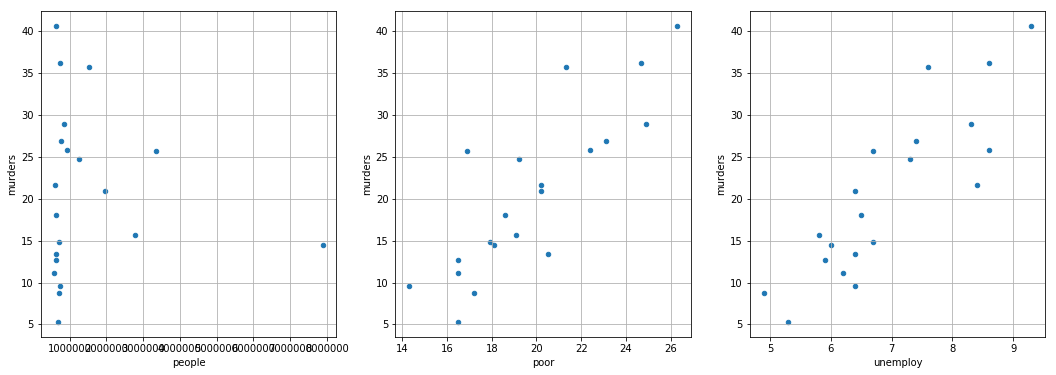

In [3]:
print(data.head())

_, axes = plt.subplots(1, 3, figsize=(18, 6))
data.plot(kind='scatter', x='people', y='murders', ax=axes[0], grid=1)
data.plot(kind='scatter', x='poor', y='murders', ax=axes[1], grid=1)
data.plot(kind='scatter', x='unemploy', y='murders', ax=axes[2], grid=1)

plt.show()

     people      poor  unemploy   murders
0  0.000000  0.183333  0.295454  0.166667
1  0.007663  0.516667  0.340909  0.228814
2  0.006568  1.000000  1.000000  1.000000
3  0.014368  0.183333  0.090909  0.000000
4  0.090449  0.408333  0.545455  0.550847


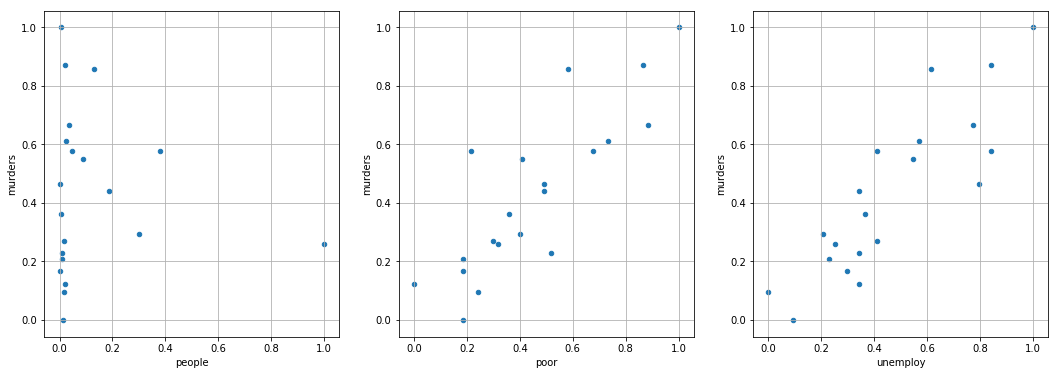

In [4]:
data[['unemploy', 'poor', 'people', 'murders']] = preprocessing.MinMaxScaler().fit_transform(
    data[['unemploy', 'poor', 'people', 'murders']]
)
print(data.head())

_, axes = plt.subplots(1, 3, figsize=(18, 6))
data.plot(kind='scatter', x='people', y='murders', ax=axes[0], grid=1)
data.plot(kind='scatter', x='poor', y='murders', ax=axes[1], grid=1)
data.plot(kind='scatter', x='unemploy', y='murders', ax=axes[2], grid=1)

plt.show()

In [5]:
data.head(5)

,people,poor,unemploy,murders
0,0.000000,0.183333,0.295454,0.166667
1,0.007663,0.516667,0.340909,0.228814
2,0.006568,1.000000,1.000000,1.000000
3,0.014368,0.183333,0.090909,0.000000
4,0.090449,0.408333,0.545455,0.550847


In [7]:
rows = len(data.unemploy)
xdata = data[['people', 'poor', 'unemploy']].ix[:].values
ydata = np.asarray(data.murders.values.reshape(rows,1))

# xdata = np.asarray([data[key].values for key in data.keys()[:-1]])
# ydata = np.asarray([data.murders.values for key in data.keys()[:-1]])

print(xdata.shape)
print(ydata.shape)

feature = len(xdata[0])
feature

(20, 3)
(20, 1)


/Users/breezymind/.pyenv/versions/3.5.0/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


3

In [8]:
X = tf.placeholder(tf.float32, [None, feature], name='X')
Y = tf.placeholder(tf.float32, [None, 1], name='Y')
# X
# Y

In [9]:
# W = tf.Variable(tf.random_uniform([feature, 1],-1.,1.), dtype=tf.float32)
# b = tf.Variable(tf.random_uniform([1],-1.,1.), dtype=tf.float32)

W = tf.Variable(tf.random_normal([feature, 1]), name='W')
B = tf.Variable(tf.random_normal([1]), name='B')

In [10]:
H = tf.matmul(X,W)+B

In [11]:
C = tf.reduce_mean(tf.square(H-Y))

In [12]:
T = tf.train.GradientDescentOptimizer(0.01).minimize(C)

In [13]:
history = {
    'weight' : [],
    'bias' : [],
    'cost' : [],
    'h' : []
}

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#     (w*xdata+b)
#     print(xdata.shape)
#     print(ydata.shape)

for step in range(500):
    _,c,w,h,b = sess.run([T,C,W,H,B], feed_dict={X: xdata, Y: ydata})

    history['weight'].append(w)
    history['bias'].append(b)
    history['cost'].append(c)
    history['h'].append(h)

    if step % 50 == 0:
        print(w)
#             print(c)

[[ 0.80188739]
 [ 0.68166286]
 [-1.21357358]]
[[ 0.75345063]
 [ 0.78296453]
 [-1.08077061]]
[[ 0.70138979]
 [ 0.83941644]
 [-0.99442786]]
[[ 0.65207046]
 [ 0.88181031]
 [-0.92302233]]
[[ 0.60661018]
 [ 0.91745353]
 [-0.85905576]]
[[ 0.56497413]
 [ 0.94833428]
 [-0.80047297]]
[[ 0.52689362]
 [ 0.9752121 ]
 [-0.74647671]]
[[ 0.49207139]
 [ 0.99854153]
 [-0.69658363]]
[[ 0.46022469]
 [ 1.01868153]
 [-0.65040964]]
[[ 0.43109372]
 [ 1.03594565]
 [-0.60761762]]


In [14]:
res = pd.DataFrame(history)
res.head(2)

,bias,cost,h,weight
0,[0.461208],0.264138,"[[0.22324], [0.400264], [-0.0749188], [0.48376...","[[0.801887], [0.681663], [-1.21357]]"
1,[0.463822],0.261057,"[[0.227624], [0.405827], [-0.0654359], [0.4873...","[[0.801068], [0.684652], [-1.20993]]"


In [15]:
for idx, item in enumerate(['people','poor','unemploy']):
    res['w_'+item] = np.array(history['weight'])[:,idx]
    res['h_'+item] = np.array(history['h'])[:,idx]
    
#     res['bias_'+item] = np.array(history['bias'])
#     print(res['bias_'+item])
#     print(np.array(history['bias'])[idx])

# del res['weight']
res.head(2)

,bias,cost,h,weight,w_people,h_people,w_poor,h_poor,w_unemploy,h_unemploy
0,[0.461208],0.264138,"[[0.22324], [0.400264], [-0.0749188], [0.48376...","[[0.801887], [0.681663], [-1.21357]]",0.801887,0.223240,0.681663,0.400264,-1.213574,-0.074919
1,[0.463822],0.261057,"[[0.227624], [0.405827], [-0.0654359], [0.4873...","[[0.801068], [0.684652], [-1.20993]]",0.801068,0.227624,0.684652,0.405827,-1.209926,-0.065436


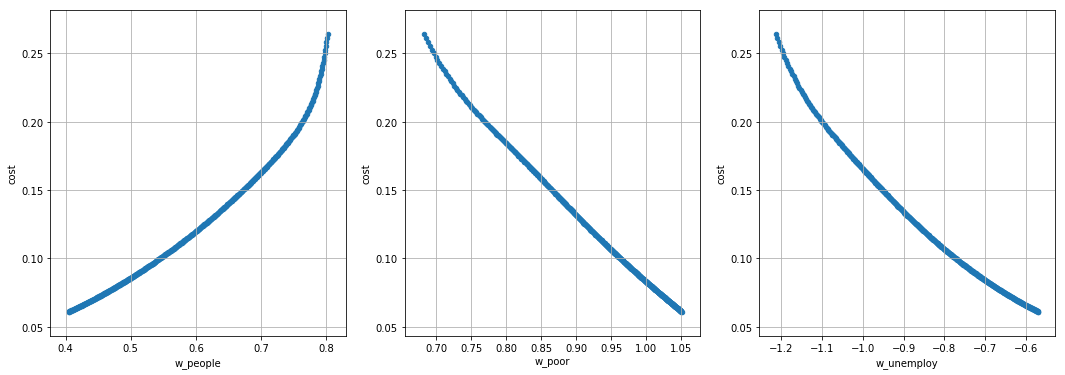

In [16]:
_, axes = plt.subplots(1, 3, figsize=(18, 6))
res.plot(kind='scatter', x='w_people', y='cost', ax=axes[0], grid=1)
res.plot(kind='scatter', x='w_poor', y='cost', ax=axes[1], grid=1)
res.plot(kind='scatter', x='w_unemploy', y='cost', ax=axes[2], grid=1)

plt.show()

In [596]:
# _, axes = plt.subplots(1, 3, figsize=(18, 6))

# print(len(np.linspace(-1.,max(data.people),500)))
# print(len(res.h_people))

# res.plot(kind='scatter', x=data.people, y=res.h_people, grid=1)
# res.plot(kind='scatter', 
#          x=data.poor, 
#          y=((res.w_poor*data.poor)+res.bias), ax=axes[1], grid=1)
# res.plot(kind='scatter', 
#          x=data.unemploy, 
#          y=((res.w_unemploy*data.unemploy)+res.bias), ax=axes[2], grid=1)

# plt.show()

In [598]:
# plt.plot(res['w_unemploy'], history['c'])
# plt.xlabel('weight')
# plt.ylabel('cost')
# plt.show()